# System Properties

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Causality

The [principle of causality](https://en.wikipedia.org/wiki/Causality) states that an effect has to follow its cause temporally. Theoretical systems may violate this fundamental principle which prohibits their practical applicability. Causality is an important aspect for the practical realization of systems. Conditions for the impulse response of a linear time-invariant (LTI) causal system as well as for its transfer function are derived in this section.

### Condition for the Impulse Response

The output signal $y(t) = \mathcal{H} \{ x(t) \}$ of an LTI system is given by convolving the input signal $x(t)$ with its impulse response $h(t)$

\begin{equation}
y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t-\tau) \; d\tau = \int_{-\infty}^{\infty} x(t - \tau) \cdot h(\tau) \; d\tau
\end{equation}

Analyzing the first integral reveals that the computation of the output signal $y(t)$ for some time instant $t=t_0$ requires knowledge of the input signal for all time instants. This includes also future time instants $t > t_0$. While this does not pose a problem for signals and impulse responses given in closed-form, this is not feasible in practice. Without imposing further restrictions, this would require the knowledge of the input signal for all future time instances.

Causality is not violated if we modify the integration limits of the convolution integral

\begin{equation}
y(t) = \int_{-\infty}^{t} x(\tau) \cdot h(t-\tau) \; d\tau = \int_{0}^{\infty} x(t - \tau) \cdot h(\tau) \; d\tau
\end{equation}

Now the output signal $y(t)$ for a given time instant $t=t_0$ depends only on the input signal $x(t)$ for $t \leq t_0$. Comparing the second equality with the second equality of the original convolution integral yields that the modified integration limits are equal to the assumption that  $h(t) = 0$ for $t < 0$.

A system is termed *causal system* [iff](https://en.wikipedia.org/wiki/If_and_only_if) its impulse response $h(t)$ is a causal signal

\begin{equation}
h(t) = 0 \qquad \text{for } t < 0
\end{equation}

Only causal systems can be practically realized due to above reasoning.

### Condition for the Transfer Function

The transfer function $H(j \omega) = \mathcal{F} \{ h(t) \}$ of a causal system shows specific symmetries. A causal impulse response $h(t)$ has to fulfill the following relation

\begin{equation}
h(t) = h(t) \cdot \epsilon(t)
\end{equation}

Fourier transformation of the left- and right-hand side yields

\begin{equation}
H(j \omega) = \frac{1}{\pi} H(j \omega) * \frac{1}{j \omega}
\end{equation}

by application of the [multiplication theorem](../fourier_transform/theorems.ipynb#Multiplication-Theorem) in conjunction with the [Fourier transform of the Heaviside signal](../fourier_transform/theorems.ipynb#Transformation-of-the-Heaviside-signal). Decomposing this result into the real and imaginary part of $H(j \omega)$ derives the following symmetry relations for a causal system

\begin{align}
\Re \{ H(j \omega) \} &= \frac{1}{\pi} \Im \{ H(j \omega) \} * \frac{1}{\omega} \\
\Im \{ H(j \omega) \} &= - \frac{1}{\pi} \Re \{ H(j \omega) \} * \frac{1}{\omega}
\end{align}

The convolution of a spectrum with $\frac{1}{\omega}$ is known as [Hilbert transform](https://en.wikipedia.org/wiki/Hilbert_transform). Above result states that the real and imaginary part of the spectrum $H(j \omega)$ of a causal system are related by the Hilbert transform. 

## Stability

The stability of a system can be evaluated with respect to different criteria. The most common ones are [Lyapunov stability](https://en.wikipedia.org/wiki/Lyapunov_stability) and [bounded-input bounded-output stability](https://en.wikipedia.org/wiki/BIBO_stability). The latter is introduced in the following.

### Bounded-Input Bounded-Output Stability

With respect to the bounded-input bounded-output (BIBO) principle, an LTI system is termed stable if its output signal $y(t) = \mathcal{H} \{ x(t) \}$ is bounded for a bounded input signal $x(t)$. A signal is bounded if its magnitude does not exceed a given finite value. For the in- and output this condition is formulated as

\begin{align}
|x(t)| &< M_1 \\
|y(t)| &< M_3
\end{align}

where $M_1, M_3 < \infty$ denote constant finite bounds. The BIBO criterion is illustrated in the following

![BIBO stability](BIBO_stability.png)

#### Condition for the Impulse Response

In order to derive a condition for the impulse response $h(t)$ of an LTI system that conforms to the BIBO criterion, the magnitude of the output signal $y(t)$ is expressed by convolving the input signal $x(t)$ with the impulse response

\begin{equation}
|y(t)| = \left| \int_{-\infty}^{\infty} x(\tau) \cdot h(t-\tau) \; d\tau \right|
\end{equation}

An upper bound for the magnitude of the output signal is found by applying the [triangle inequality](https://en.wikipedia.org/wiki/Triangle_inequality) together with the upper bound for $|x(t)|$

\begin{equation}
|y(t)| \leq \int_{-\infty}^{\infty} |x(\tau)| \cdot |h(t-\tau)| \; d\tau < \int_{-\infty}^{\infty} M_1 \cdot |h(t-\tau)| \; d\tau
\end{equation}

Since the output signal $|y(t)|$ shall be bounded, it can be concluded that the impulse response needs to be an [absolutely integrable function](https://en.wikipedia.org/wiki/Absolutely_integrable_function)

\begin{equation}
\int_{-\infty}^{\infty} |h(t)| \; dt < M_2
\end{equation}

where $M_2 < \infty$ denotes a constant finite bound.

An LTI system is stable in the sense of the BIBO stability criterion iff its impulse response is absolutely integrable. Since absolute integrability of a signal is sufficient for the [existence of its Fourier transform](../fourier_transform/definition.ipynb#Definition), this implies that the transfer function $H(j \omega) = \mathcal{F} \{ h(t) \}$ exists.

#### Conditions for Rational Transfer Functions

For a rational transfer function $H(s)$, the BIBO stability of an LTI system implies constraints on the locations of its poles. These constraints are derived in the following.

The inverse Laplace transform of a right-sided signal can be computed in closed form [using the partial fraction decomposition](../laplace_transform/inverse.ipynb#Basic-Procedure) of its Laplace transform. Applying this to the transfer function $H(s)$, the impulse response $h(t) = \mathcal{L}^{-1} \{ H(s) \}$ is given as

\begin{equation}
h(t) = A_0 \cdot \delta(t) + \epsilon(t) \sum_{\mu = 1}^{L} e^{s_{\infty \mu} t} \sum_{\nu = 1}^{R_\mu} \frac{A_{\mu \nu} \, t^{\mu - 1}}{(\nu -1)!}
\end{equation}

where $s_{\infty \mu}$ denotes the $\mu$-th unique pole of $H(s)$, $R_\mu$ its degree, $L$ the total number of different poles $\mu = 1 \dots L$, and $A_0$ and $A_{\mu \nu}$ the coefficients of the partial fraction decomposition. Above formula for the inverse Laplace transform holds only if the order $M$ of the numerator is smaller or equal to the order $N$ of the denominator. If $M > N$, the impulse response is not absolutely integrable. Consequently the system is not stable in the BIBO sense.

For $M \leq N$ one has to check under which conditions above impulse response $h(t)$ is absolutely integrable. The first term $A_0 \delta(t)$ does not pose a problem for $A_0 < \infty$. Under the assumption $A_{\mu \nu} < \infty$, the absolute integrability of the second term is checked by evaluating

\begin{equation}
\int_{-\infty}^{\infty} |\epsilon(t) t^{\mu - 1} e^{s_{\infty \mu} t}| \; dt = \int_0^{\infty} t^{\mu - 1} e^{\sigma_{\infty \mu} t} \; dt
\end{equation}

where $s_{\infty \mu} = \sigma_{\infty \mu} + j \omega_{\infty \mu}$. Above integral is absolutely integrable if $\sigma_{\infty \mu} < 0$. 

From above results it can be concluded that a system with rational transfer function $H(s)$ and right-sided impulse response $h(t)$ is stable with respect to the BIBO criterion if

* the order $M$ of its numerator is smaller or equal to the order $N$ of its numerator and 
* all poles are located in the left $s$-half-plane
    \begin{equation}
    \Re \{ s_{\infty \mu} \} < 0 \qquad \forall \mu
    \end{equation}

The locations of the zeros of the transfer function have no influence on the stability of a system.

In order to investigate the stability of a given system the poles of the rational transfer function $H(s)$ have to be determined. This can be performed by computing the roots of the denominator polynomial. However, in order to avoid the computationally complex computation of roots, several stability tests have been developed. These determine the stability of a system from the coefficients of the denominator polynomial. An example of such a test is the [Routh–Hurwitz stability criterion](https://en.wikipedia.org/wiki/Routh%E2%80%93Hurwitz_stability_criterion).

**Example**

The impulse response $h(t) = \mathcal{L}^{-1} \{ H(s) \}$ of a 2nd-order system with transfer function

\begin{equation}
H(s) = \frac{1}{(s-s_\infty)(s-s^*_\infty)}
\end{equation}

is computed. First the case of a stable system is considered by assuming $\Re \{ s_\infty \} < 0$ with $s_\infty = -1 + j$. The impulse response $h(t)$ is computed by inverse Laplace transform of the transfer function

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)
s_inf = -1 + sym.I

H = 1/((s - s_inf)*(s - sym.conjugate(s_inf)))
h = sym.inverse_laplace_transform(H, s, t)
h

The impulse response is plotted for illustration

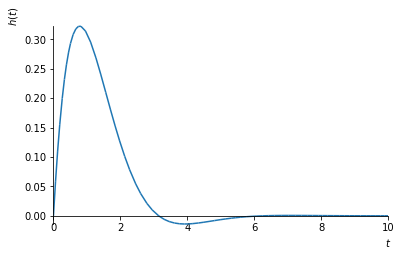

In [2]:
sym.plot(h, (t, 0, 10), xlabel='$t$', ylabel='$h(t)$');

It can be observed that the amplitude of the impulse response decays exponentially with increasing time $t$. The absolute integrability of the impulse response is confirmed by noting that

\begin{equation}
\int_{-\infty}^{\infty} | \epsilon(t) e^{-t} \sin(t) | \; dt = \int_{0}^{\infty} | e^{-t} \sin(t) | \; dt < \int_{0}^{\infty} | e^{-t} | \; dt = 1
\end{equation}

Now the impulse response of an instable system is computed by assuming $\Re \{ s_\infty \} > 0$ with $s_\infty = 1 + j$

In [3]:
s_inf = 1 + sym.I

H = 1/((s - s_inf)*(s - sym.conjugate(s_inf)))
h = sym.inverse_laplace_transform(H, s, t)
h

Again the impulse response is plotted for illustration

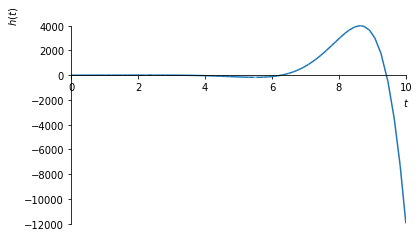

In [4]:
sym.plot(h, (t, 0, 10), xlabel='$t$', ylabel='$h(t)$');

The impulse response shows exponentially increasing negative values for increasing time. The impulse response is clearly not absolutely integrable and hence the system not stable in the BIBO sense.

## Realizability

A system is said the be realizable if it is a causal and stable system. Realizability is a prerequisite for the practical implementation of systems. Causality implies that the impulse response $h(t)$ of the system has to be a causal signal. Hence the region of convergence (ROC) of its transfer function $H(s) = \mathcal{L} \{ h(t) \}$ is the half-plane located right of all poles. Stability and causality of a system with rational transfer function $H(s)$ implies that its poles are located in the left $s$-half-plane.

Summarizing, a system with rational transfer function $H(s)$ is realizable iff all poles of $H(s)$ are located in the left $s$-half-plane not including the imaginary axis and the ROC is given by the right $s$-half-plane including the imaginary axis. The locations of the zeros of the transfer function have no influence on the realizability of systems.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.